#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

## Equipo 08

*   Octavio Alberto García Morán A01213977
*   Cecilia Acevedo Rodríguez A01793953
*   José Ovalle Alvarado A01150742


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV

from scipy.stats import alpha
from sklearn import tree

#**Ejercicio-1.** 

In [2]:
#Lectura usando la ruta  para no tener que usar el zip
df= pd.read_csv('https://raw.githubusercontent.com/cacevedo29/Equipo08_IA/main/SouthGermanCredit.asc', sep='\s+')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
#Cambio nombres de las columnas
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [4]:
#Partición y preparación de los datos

#Variables de entrada
X = df.iloc[:,0:20]

#Variables de salida
y = df.iloc[:, -1]

#85% y 15%
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)
X_train.head()
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [5]:
#Revisión de la partición de las variables de entrada
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-3.**

**a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).**

In [6]:
#definición de los tipos de variables

#Categóricas
df_cat = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
#Ordinales
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#Númericas
df_num = ['duration','amount','age']
#Binarias
df_bin = ['people_liable','telephone','foreign_worker']

In [7]:
# 3.a revisión de valores nulos para imputación 
X_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

No se tienen valores nulos, por lo que no se debe realizar niguna imputación de valores.

**b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.**


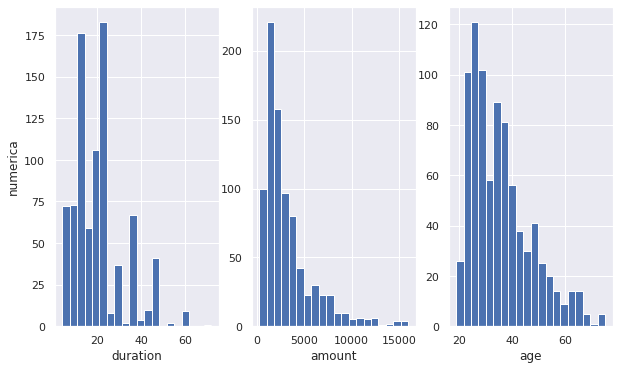

In [8]:
#Revisión de los datos
sns.set(rc={'figure.figsize':(10,20)}) #tama;o 20 en x y 20 en y
#Numerica
k=0
fig, axes = plt.subplots(1, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = X_train[df_num].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('numerica')

La distribución de los datos parece estar cargada a la izquierda, ya que se concentan muchos datos de ese lado, se recomienda usar la mediana como transformación para evitar un sesgo.

In [9]:
#mediana para las variables númericas
df_num_pip= Pipeline(steps = [('impMean', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])
columnas_a_aplicar_df_num_pip = df_num 

**c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.**

In [10]:
#One-hot encoding para las otras variables no númericas (categóricas)
df_cate_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_a_aplicar_df_num_cate = df_cat

#One-hot encoding para las otras variables no númericas (binarias)

df_bin_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_a_aplicar_df_nbin_pip = df_bin

# matriz con las tranformaciones definidas

Col_Trans = ColumnTransformer(transformers=[('númericas', df_num_pip, columnas_a_aplicar_df_num_pip), 
                                            ('categóricas', df_cate_pip, columnas_a_aplicar_df_num_cate), 
                                            ('binarias', df_bin_pip, columnas_a_aplicar_df_nbin_pip)], 
                                            remainder='passthrough')

# se revisa que existan las transformaciones de los One-Hot encoding
X_train_fit = Col_Trans.fit(X_train)
pd.DataFrame(X_train_fit.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.117647,1.048232,1.053571,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0
1,1.294118,1.095381,1.089286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,2.0,4.0,1.0,2.0,1.0,2.0
2,1.117647,1.034724,1.607143,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,2.0,4.0,4.0,2.0,1.0,3.0
3,1.470588,1.154253,1.553571,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,4.0,4.0,4.0,1.0,3.0
4,1.470588,1.502262,1.196429,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.088235,1.085824,1.375000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3.0,3.0,2.0,4.0,1.0,2.0
846,1.117647,1.170755,1.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,1.0,3.0
847,1.294118,1.130806,1.464286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0
848,1.294118,1.309207,1.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,3.0,3.0,4.0,3.0,3.0


La matriz se hizo más grande, ya que existen las transformaciones que se crearion con los One-Hot encoding.

#**Ejercicio-4.**

**4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características:**

a. Usa los parámetros predeterminados de cada modelo.

b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).

c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones

In [11]:
#Definición de los tres modelos requeridos en las insturcciones

def get_models():
  modelos = list()
  nombres = list()


  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  #RD - Ranfom Forest
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  return modelos, nombres

In [12]:
#Definición de las métricas de desempeño

#Accuaracy
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

#Precision
def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

#Recall
def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#F-1
def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

#G-mean
def mi_gmean(yreal, ypred):
  tn,fp,fn,tp= confusion_matrix(yreal,ypred).ravel()
  recall = mi_recall(yreal, ypred)
  especificidad= tn / (tn+fp)
  gmean = np.sqrt(recall*especificidad)
  return gmean


**d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.**

In [13]:
#se continúa con la validación estratificada con las 5 particiones y 3 repeticiones

modelos, nombres = get_models()
resultados = list()

#creación del for para realizar los entrenamimentos
#kfold para definir las particiones y repetciones

for i in range(len(modelos)):
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',Col_Trans),('m',modelos[i])])

#Métricas que se aplicaran a la validación

  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

#resultados de la validación
  resultadosMet = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=kfold, return_train_score=True)

  resultados.append(resultadosMet)
  print("Prueba \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosMet['test_accuracy']), np.std(resultadosMet['test_accuracy']), 
                                                                          np.mean(resultadosMet['test_precision']),np.std(resultadosMet['test_precision']), 
                                                                          np.mean(resultadosMet['test_recall']),np.std(resultadosMet['test_recall']),
                                                                          np.mean(resultadosMet['test_f1score']),np.std(resultadosMet['test_f1score']),
                                                                          np.mean(resultadosMet['test_gmean']),np.std(resultadosMet['test_gmean'])
                                                                          ))
  
  # Con este paramtero dentro de la validaci[on cruzada,  return_train_score=True), podemos acceder a los datos de abai
  print("Entrenamiento \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosMet['train_accuracy']), np.std(resultadosMet['train_accuracy']),  
                                                                          np.mean(resultadosMet['train_precision']), np.std(resultadosMet['train_precision']), 
                                                                          np.mean(resultadosMet['train_recall']), np.std(resultadosMet['train_recall']),
                                                                          np.mean(resultadosMet['train_f1score']), np.std(resultadosMet['train_f1score']), 
                                                                          np.mean(resultadosMet['train_gmean']), np.std(resultadosMet['train_gmean']) ))

Prueba 

LR:
mean Accuracy: 0.757 (0.0347)
mean Precision: 0.796 (0.0251)
mean Recall: 0.883 (0.0319)
mean F1score: 0.837 (0.0231)
Gmean: 0.627 (0.0666)

Entrenamiento 

LR:
mean Accuracy: 0.791 (0.0086)
mean Precision: 0.819 (0.0082)
mean Recall: 0.906 (0.0051)
mean F1score: 0.860 (0.0053)
Gmean: 0.681 (0.0180)

Prueba 

DT:
mean Accuracy: 0.673 (0.0427)
mean Precision: 0.768 (0.0321)
mean Recall: 0.773 (0.0498)
mean F1score: 0.770 (0.0324)
Gmean: 0.571 (0.0735)

Entrenamiento 

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Prueba 

RF:
mean Accuracy: 0.757 (0.0231)
mean Precision: 0.779 (0.0158)
mean Recall: 0.918 (0.0239)
mean F1score: 0.843 (0.0152)
Gmean: 0.579 (0.0465)

Entrenamiento 

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



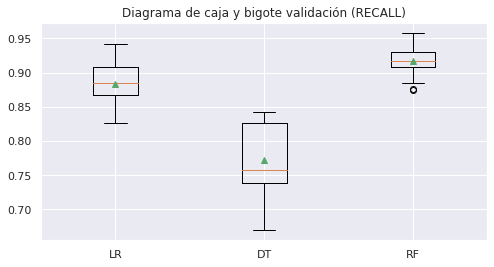

In [14]:
sns.set(rc={'figure.figsize':(8,4)})

recall_list = list()

for i in range(len(resultados)):
  valor = resultados[i]['test_recall']
  recall_list.append(valor)

plt.boxplot(recall_list, labels=nombres, showmeans=True)
plt.title("Diagrama de caja y bigote validación (RECALL)")

plt.show()

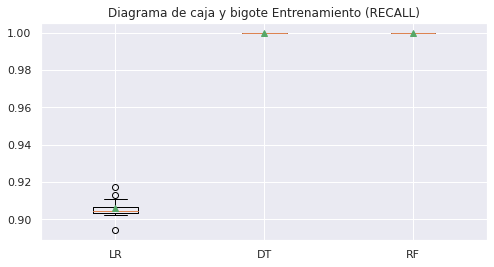

In [15]:
sns.set(rc={'figure.figsize':(8,4)})

recall_list = list()

for i in range(len(resultados)):
  valor = resultados[i]['train_recall']
  recall_list.append(valor)

plt.boxplot(recall_list, labels=nombres, showmeans=True)
plt.title("Diagrama de caja y bigote Entrenamiento (RECALL)")

plt.show()

Se puede decir, que los modelos DT y RF, están sobreentrenados por el valor de 1.0 en el entranamiento y por su bajo recall en el set de validación.

**e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:**

i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
desempeño de dicha función “learning_curve()”. 



In [16]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores): 
  train_mean = np.mean(train_scores, axis=1) 
  train_std = np.std(train_scores, axis=1) 
  val_mean = np.mean(val_scores, axis=1) 
  val_std = np.std(val_scores, axis=1) 

# Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar. 
  plt.figure(figsize=(7,6)) 
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training') 
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')  
  plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation') 
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')  
  plt.title('Curvas de Aprendizaje: aumento en el tamaño de la muestra') 
  plt.xlabel('Tamaño conjunto de entrenamiento') 
  plt.ylabel('Exactitud (accuracy)') 
  plt.grid() 
  plt.legend(loc='lower left') 
  plt.show()

# definición para poder plotear
def mi_ModeloYCurvas(Xin):
  modelo_logi = LogisticRegression(max_iter=2500, random_state=1) 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("LR", modelo_logi)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(0.1, 1.0, 40) 
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje Regresión Lógistica:


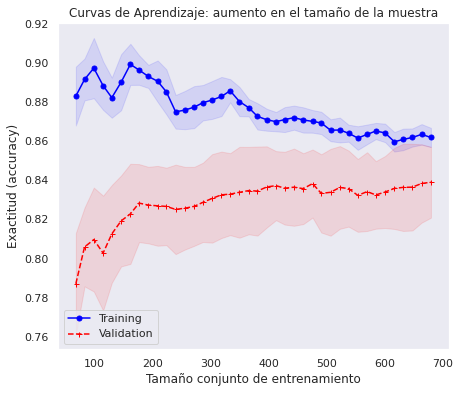

In [17]:
def Curves(train_sizes, train_scores, val_scores, titulo_de_grafica): 

  train_mean = np.mean(train_scores, axis=1) 
  train_std = np.std(train_scores, axis=1) 
  val_mean = np.mean(val_scores, axis=1) 
  val_std = np.std(val_scores, axis=1) 
  plt.figure(figsize=(7,6)) 
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training') 
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')  
  plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation') 
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')  
  plt.title(titulo_de_grafica) 
  plt.xlabel('Tamaño del conjunto de entrenamiento') 
  plt.ylabel('Exactitud (accuracy)') 
  plt.grid() 
  plt.legend(loc='lower left') 
  plt.show()

print('Curvas de aprendizaje Regresión Lógistica:')

mi_ModeloYCurvas(X_train)

Se puede observar como el set training disminuye un poco la exactitud con el paso de las iteraciones, sin embargo, si parece estar aprendiendo y no memorizando porqué la curva nunca se junta con la línea roja.

**ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.**

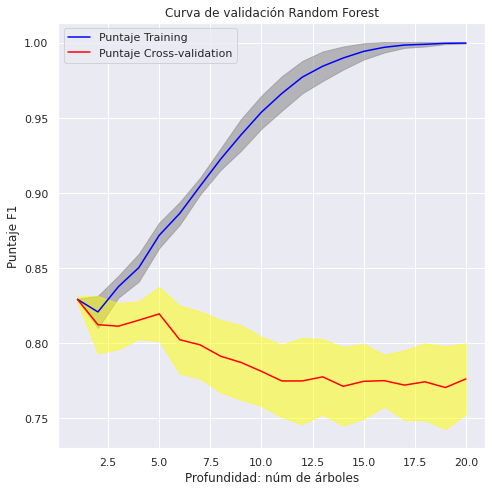

In [18]:
#función para crear el árbol, se marca la profundidad de hasta 20

def curva_validacion (x_val,y_val,param_name,cv_entrada,scoring):
  modelo = DecisionTreeClassifier()
  pipe = Pipeline(steps=[("Preparainfo",Col_Trans),("model",modelo)])
  rango_param = np.linspace(1, 20, 20,dtype="int")
  t_scores, v_scores = validation_curve(
      estimator=pipe,
      X=x_val, y=y_val, 
      param_name=f"model__{param_name}", #
      param_range=rango_param, cv=cv_entrada,
      scoring=scoring,
  )

  return rango_param, t_scores, v_scores

#Curva de validación
param_range,train_score, validation_score = curva_validacion(X_train,y_train,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Puntaje Training", color="blue")
plt.plot(param_range, test_mean, label="Puntaje Cross-validation", color="red")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="yellow",alpha=0.5)
 
plt.title("Curva de validación Random Forest")
plt.xlabel("Profundidad: núm de árboles")
plt.ylabel("Puntaje F1")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

De la gráfica anterior, destaca la relación positiva que existe entre el aumento de la profundidad y el aumento del puntaje F1 para el ser de Training. Sin embargo, se debe tener en consideración que, mientras más profundo sea el modelo de RF, más capacidad computacional será necesaria para mejorar el puntaje.

**iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.**


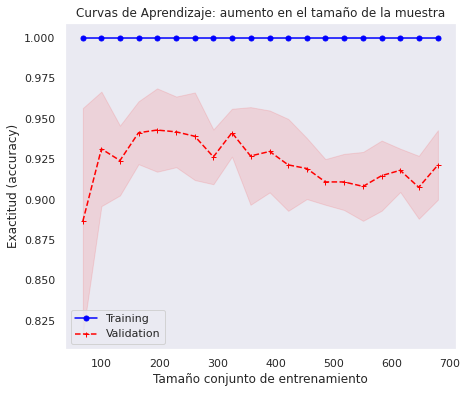

In [19]:
def CurvaRF(X_entrada): 
  modeloRF = RandomForestClassifier() 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloUSadoRandomForest", modeloRF)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_recall)) 

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)
CurvaRF(X_train)

#**Ejercicio-5.**

**5. Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline**

a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la
documentación. 


In [20]:
#definición de parámetros con base en la documentación de GridSearch

modelo_CV = LogisticRegression(max_iter=8000, random_state=1) 
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)


paramTest= [0.001, 0.01, 0.1, 1, 10, 100, 1000]


ParametrosSearch = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': paramTest},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': paramTest},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': paramTest, 'model__l1_ratio': [0.5]},
                 ]

gridFinal=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosSearch,
                            scoring = 'f1', 
                            cv = mi_kfoldCV)
  

gridFinal.fit(X_train, np.ravel(y_train))

B_score = gridFinal.best_score_
B_param = gridFinal.best_params_
print("Mejor score:", B_score)
print("Mejor parámetro:", B_param)

Mejor score: 0.8431120645702244
Mejor parámetro: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}


**b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.**

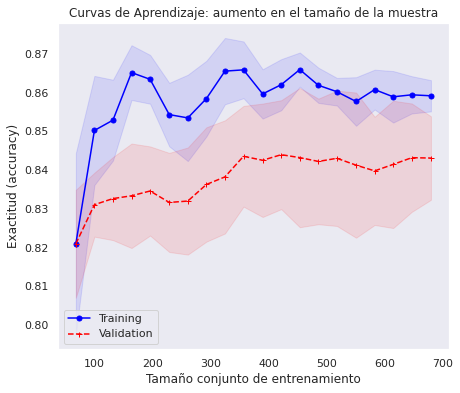

In [21]:
#Definición con nuevos hiperpárametros para gráfica

def graf_BHP(X_entrada, parametro_C, penalizacion, resolutor, peso):
  modelo_CV = LogisticRegression(C=parametro_C, solver=resolutor,class_weight=peso, penalty=penalizacion, max_iter=8000, random_state=1)
  pipe_CV = Pipeline(steps=[("PreparaInfo", Col_Trans),("RegresionLogistica", modelo_CV)])
  kfold_CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)
  train_size_CV = np.linspace(0.1, 1.0, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe_CV ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = kfold_CV ,
                                                        train_sizes = train_size_CV ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

graf_BHP(X_train, 0.1,'l2','newton-cg', None)

Sin duda, la gráfica muestra un modelo que tiene un buen desempeño y que está aprendiendo, no se copia en ningun momento el comportamiento de set de validación.

**c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de
la métrica “precision”? Incluye tus conclusiones.**


In [22]:
#definición de parámetros con base en la documentación de GridSearch

modelo_CV = DecisionTreeClassifier()
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

ParametrosSearch = {'model__ccp_alpha':[0.01, 0.001, 0.0001, 0.00001],
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

TreeVF=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosSearch,
                            scoring = make_scorer(mi_precision),
                            cv = mi_kfoldCV)

TreeVF.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('númericas',
                                                                         Pipeline(steps=[('impMean',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

In [23]:
B_score = TreeVF.best_score_
B_param = TreeVF.best_params_
print("Mejor score:", B_score)
print("Mejor parámetro:", B_param)

Mejor score: 0.882290432268785
Mejor parámetro: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}


la precisión es importante, ya que nos dice la probabilidad o las veces que nuestro modelo puede clasificar de manera correcta (positiva) lo que se calcula. en este caso, casi 9 de cada 10 veces el modelo lo hará de manera correcta, sin embargo, se debe poner en el contexto correcto para cuantificar que tan valioso es el 90%, ya que el 10% adicional podría representar la vida de personas, o pérdidas millonarias.

**d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.**

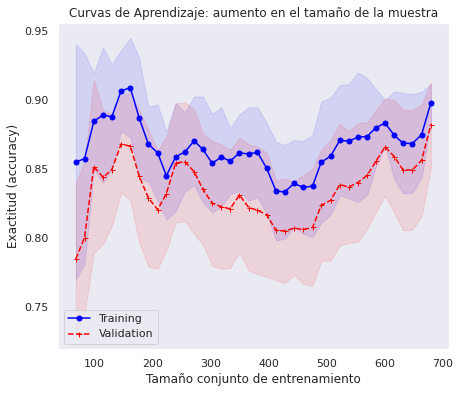

In [24]:
def DT_VF(X_entrada2): 
  modeloDT_VF = DecisionTreeClassifier(ccp_alpha=0.01,
                                     criterion='entropy',
                                     max_depth=2,
                                     min_samples_split=2, 
                                     class_weight= 'balanced')
 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloDecisionTree", modeloDT_VF)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 40) #Aqui defininos 20 puntos enla partición, con 20 valores entre el .1 y el  1
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada2,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_precision)) #aqui reemplazamos la metrica por la precision
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores) #Aqui imprimimos el learning curve que nos pide
DT_VF(X_train)

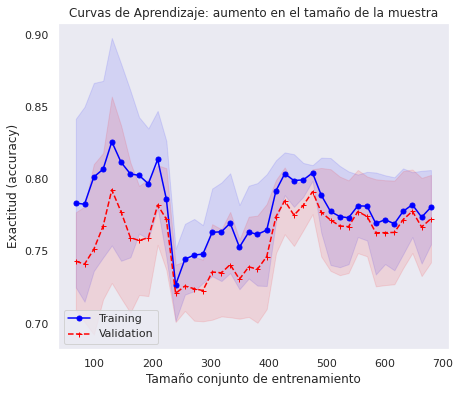

In [25]:
def DT_VF(X_entrada2): 
  modeloDT_VF = DecisionTreeClassifier(ccp_alpha=0.01,
                                     criterion='gini',
                                     max_depth=2,
                                     min_samples_split=2)
 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloDecisionTree", modeloDT_VF)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 40) #Aqui defininos 20 puntos enla partición, con 20 valores entre el .1 y el  1
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada2,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_precision)) #aqui reemplazamos la metrica por la precision
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores) #Aqui imprimimos el learning curve que nos pide
DT_VF(X_train)

En este caso se intentó con los criterios de split entropía y Gini, ya qué se encontró en algunas fuentes que, muchas de las veces, la entropía genera mejores resultados pero consume muchos recursos computacionales.

En general, las dos gráficas muestran resutados de un buen modelo que no sufre de sobre ni sub entrenamiento, la diferencia que destaca es el tiempo que tardó cada uno, el modelo Gini tardó 15 segundos y el modelo de entropía tardo 22 segundos, porcentual metente es casi 50.% más. Lo anterior implica que cuando se tengan muchos más datos, será importante evaluar que tanto abona un método.

**e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”.**
**Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.**


In [26]:
# definición para el modelo, lo mismo que el anterior, se cambia a RF

modelo_CV = RandomForestClassifier()
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

ParamVF = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth':[2, 4, 6, 8, 10, 12],
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

RF_VF=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParamVF,
                            scoring = make_scorer(mi_recall),
                            cv = mi_kfoldCV)

RF_VF.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('númericas',
                                                                         Pipeline(steps=[('impMean',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

In [27]:
print("best_score:", RF_VF.best_score_)
print("best_param:", RF_VF.best_params_)

best_score: 1.0
best_param: {'model__ccp_alpha': 0.01, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}


La métrica recall nos va a informar sobre la cantidad que el modelo es capaz de identificar. En este caso se refiere a qué porcentaje de riesgos crediticios somos capaces de identificar. 

**f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.**

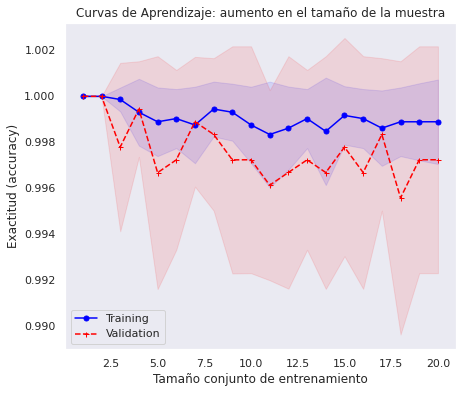

In [28]:
#modelo con los mejores parámetros de la sección anterior

modeloRF = RandomForestClassifier(ccp_alpha=0.01,
                                 criterion='gini',
                                 max_depth=10,
                                 min_samples_split=2,
                                  class_weight= None) 


mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloRandomForest", modeloRF)])
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
delta_train_sz = np.linspace(1,20,20, dtype=int)

tr_scores, val_scores = validation_curve(n_jobs = -1, 
                                  estimator = mi_pipe,
                                  X = X_train,
                                  y = np.ravel(y_train),
                                  param_name = f"ModeloRandomForest__max_depth",
                                  param_range = delta_train_sz,
                                  cv = mi_kfold, 
                                  scoring = 'recall',
                                  )
mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores)

En este caso incrementando la complejidad del modelo, se obtiene un buen desempeño del mismo, se observa que el modelo aprende ya que nunca se junta con los valores de validación y su exactitud es más alta.

#**Ejercicio-6.**

**6. Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:**

a. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido. 


In [29]:
Best_stm = gridFinal.best_estimator_
predicciones = Best_stm.predict(X_val)
print("F1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))

F1-score: 0.813 



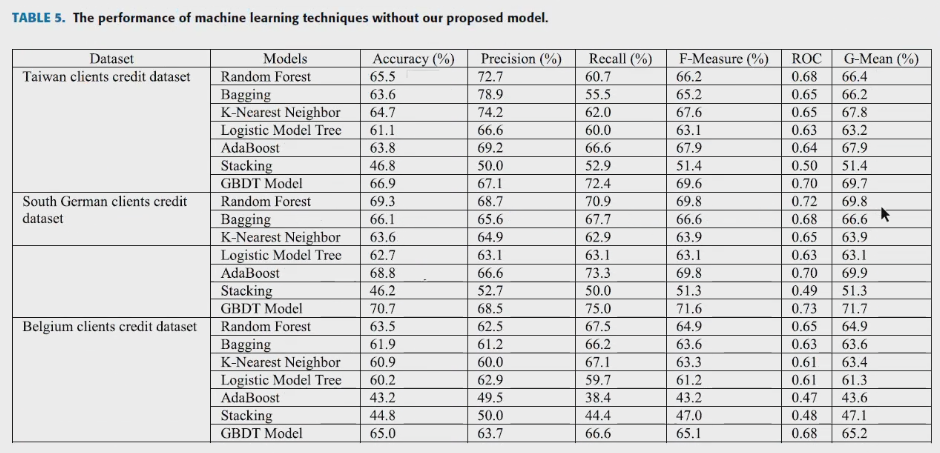

T. M. Alam et al (2020).: Investigation of Credit Card Default Prediction in the Imbalanced Datasets, IEEE Access

De acuerdo con la imagen presentada en el apartado previo, la cual corresponde a un análisis de los valores obtenidos en la métricas con diferentes métodos, los resultados obtenidos con este ejercicio superan los valores observados de métrica F1 y que presentan un desempeño entre 63-69%; por lo cual, el resultado obtenido con los hiperparámetros seleccionados es superior y se pudiera considerar que el desempeño de este modelo es bueno con una métrica F1 de 81%.

**b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.**

F1-score: 0.632 



[Text(0.5, 0.8333333333333334, 'X[6] <= 0.5\nentropy = 1.0\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.25, 0.5, 'X[0] <= 1.272\nentropy = 0.954\nsamples = 510\nvalue = [356.452, 213.206]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.998\nsamples = 299\nvalue = [159.375, 145.432]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.82\nsamples = 211\nvalue = [197.077, 67.774]'),
 Text(0.75, 0.5, 'X[36] <= 0.5\nentropy = 0.802\nsamples = 340\nvalue = [68.548, 211.794]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.0\nsamples = 52\nvalue = [25.706, 26.121]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.696\nsamples = 288\nvalue = [42.843, 185.673]')]

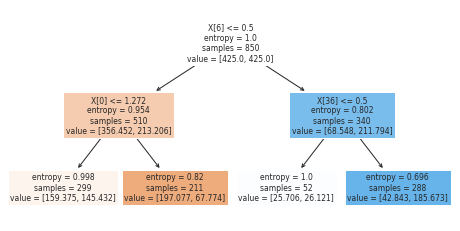

In [30]:
Op_Estm = TreeVF.best_estimator_

forecast = Op_Estm.predict(X_val)
print("F1-score: %.3f \n" %(mi_f1score(y_val, forecast)))

tree.plot_tree(Op_Estm.named_steps["model"], filled = True)

Para este caso la métrica F1 no es un indicador de un buen desempeño para identificar los riesgos crediticios.

**c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.**

In [31]:
Best_RF = RF_VF.best_estimator_
ForecastRF = Best_RF.predict(X_val)

print("Métrica recall: %.3f \n" %(mi_recall(y_val, ForecastRF)))

Métrica recall: 1.000 



###**Fin de la Actividad de la semana 6.**